# Basic Concepts
## Definition
Multiple linear regression is a statistical method used to find the relationship between two or more independent variables (also known as predictors or explanatory variables) and a dependent variable (also known as the response variable). The goal is to use the independent variables to predict or explain the variation in the dependent variable.

In the model, each independent variable has a coefficient that represents the strength and direction of its relationship with the dependent variable. The model uses these coefficients to create a linear equation that can be used to predict the value of the dependent variable based on the values of the independent variables.

## Equation
The equation for a multiple linear regression model with p independent variables (x1, x2, ..., xp) and a dependent variable y can be expressed as:
$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_p x_p + \epsilon
$$
Where y is the dependent variable, $x_1$, $x_2$, ..., $x_p$ are the independent variables, $\beta_0$ is the intercept or constant term, $\beta_1$, $\beta_2$, ..., $\beta_p$ are the coefficients (also known as regression weights) that measure the effect of each independent variable on the dependent variable, and $\epsilon$ is the error term or random error, which accounts for the variability in the dependent variable that cannot be explained by the independent variables.

#Calculation Method
##Method of Least Squares
SSR (Sum of Squared Residuals) is a method used to estimate the coefficients in a multiple linear regression model. The goal of this method is to find the values of the coefficients that minimize the sum of the squared residuals between the predicted values and the actual values of the dependent variable.

The residuals are the differences between the predicted values of the dependent variable $\hat{y}$ and the actual values of the dependent variable ($y$). In other words, the residuals represent the portion of the dependent variable that is not explained by the independent variables.
$$
SSR = \sum_{i=1}^{n}(y_i - \hat{y_i})^2
$$
To find the values of the coefficients that minimize the SSR, the method uses an optimization algorithm, such as specifying the equation for the model in matrix form.
$$
\boldsymbol{\beta} = (X'X)^{-1}X'\mathbf{y}
$$
Where:

*   The design matrix $X$:
$$
X = \begin{bmatrix}
    1 & x_{11} & x_{12} & \cdots & x_{1p} \\
    1 & x_{21} & x_{22} & \cdots & x_{2p} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    1 & x_{n1} & x_{n2} & \cdots & x_{np}
\end{bmatrix}
$$
*   The coefficient vector $\beta$:
$$
\boldsymbol{\beta} = \begin{bmatrix}
    \beta_0 \\
    \beta_1 \\
    \beta_2 \\
    \vdots \\
    \beta_p
\end{bmatrix}
$$
*   The dependent variable vector $y$:
$$
\mathbf{y} = \begin{bmatrix}
    y_1 \\
    y_2 \\
    \vdots \\
    y_n
\end{bmatrix}
$$

Once the coefficients have been estimated using the SSR method, they can be used to make predictions for new values of the independent variables. The accuracy of these predictions can be evaluated by calculating the residuals between the predicted values and the actual values of the dependent variable.

#Multiple Linear Regression coding
Below are simple implementations of a function that, by means of the method of least squares, calculates the multiple linear function of a data set.
##Python

In [ ]:
#@title Main Fuction

import numpy as np

def multiple_linear_regression(X, y):

  # Calculate the coefficients using the SSR method
  X_transpose = np.transpose(X)
  X_transpose_X = np.dot(X_transpose, X)
  X_transpose_X_inverse = np.linalg.inv(X_transpose_X)
  X_transpose_y = np.dot(X_transpose, y)
  beta = np.dot(X_transpose_X_inverse, X_transpose_y)

  return beta

In [ ]:
#@title Implementation with preset data

# Example data
X = np.array([[1, 3, 2, 5, 10],
              [1, 4, 1, -1, -2],
              [1, 5, 4, 16, 8],
              [1, 2, -3, 5, 7],
              [1, 4, 2, 0, -2]])

y = np.array([9, 11, 12, 10, 15])

beta = multiple_linear_regression(X,y)

# Print the coefficients
print('Intercept: ', beta[0])
print('Coefficients: ', beta[1:])

Intercept:  44.38947368420622
Coefficients:  [-9.65263158  2.81052632  1.18947368 -1.8       ]


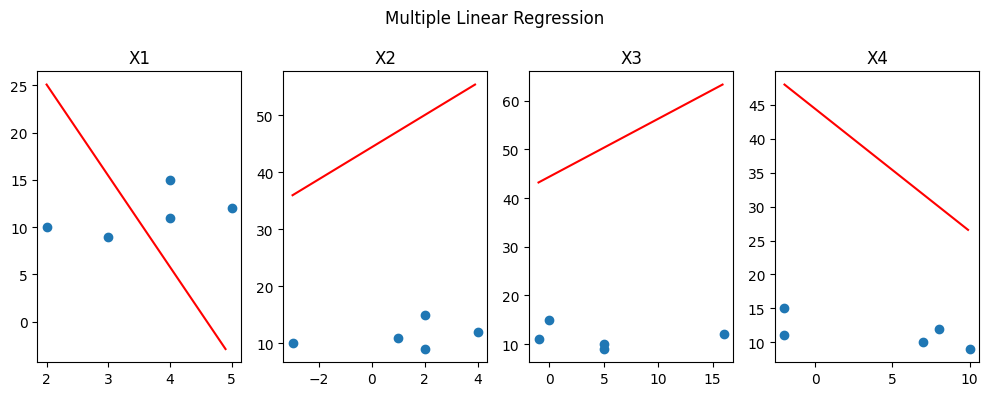

In [ ]:
#@title Graph

import matplotlib.pyplot as plt

#Get the number o columns of the X matrix
columns = np.shape(X)[1]

# Create subplots for each independent variable
fig, axs = plt.subplots(1, columns-1, figsize=(10, 4))

# Plot the regression line for each independent variable
for i in range(1, columns):
    x_vals = np.arange(np.min(X[:, i]), np.max(X[:, i]), 0.1)
    y_vals = beta[0] + beta[i] * x_vals
    axs[i-1].scatter(X[:, i], y)
    axs[i-1].plot(x_vals, y_vals, '-r', label='Regression line')
    axs[i-1].set_title('X' + str(i))

# Set the title and axis labels
fig.suptitle('Multiple Linear Regression')
fig.tight_layout()
plt.show()

Beta 0 [-0.05045632]
Beta 1 [0.00188649]
Beta 2 [0.00430907]


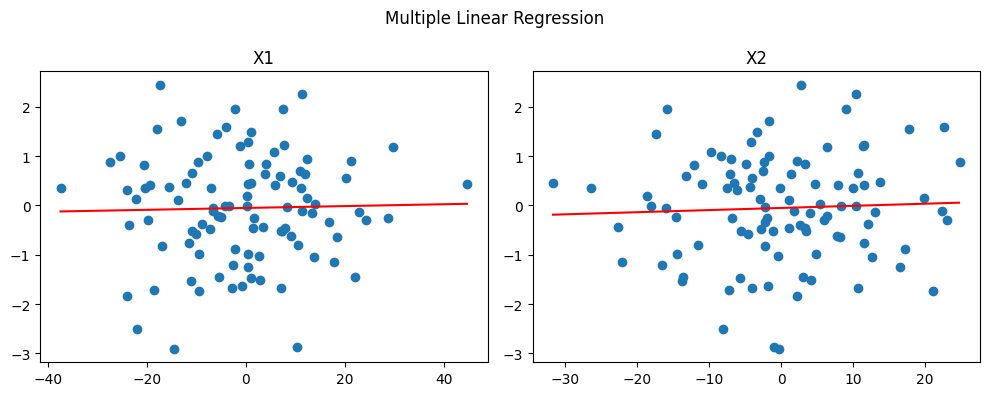

In [ ]:
#@title Custom Parameters

# Generate random data
np.random.seed(40)

#@markdown Select the amount of data that each variable will have
n = 100 #@param {type:"slider", min:0, max:100, step:1}

#@markdown Select the amount of independent variables the model will have
ind_var = 2 #@param {type:"slider", min:0, max:10, step:1}

#@markdown Select the factor that multiplies the randomly generated data
xfactor = 13 #@param {type:"slider", min:0, max:50, step:1}
yfactor = 1 #@param {type:"slider", min:0, max:50, step:1}

X = np.random.randn(n, ind_var)*xfactor # Some independent variables
y = np.random.randn(n,1)*yfactor  # Dependent variable

# Add a column of ones to matrix X
X = np.c_[np.ones(X.shape[0]), X]

beta = multiple_linear_regression(X, y)
for i in range(len(beta)):
  print(f"Beta {i}", beta[i])

#Get the number o columns of the X matrix
columns = np.shape(X)[1]

# Create subplots for each independent variable
fig, axs = plt.subplots(1, columns-1, figsize=(10, 4))

# Plot the regression line for each independent variable
for i in range(1, columns):
    x_vals = np.arange(np.min(X[:, i]), np.max(X[:, i]), 0.1)
    y_vals = beta[0] + beta[i] * x_vals
    axs[i-1].scatter(X[:, i], y)
    axs[i-1].plot(x_vals, y_vals, '-r', label='Regression line')
    axs[i-1].set_title('X' + str(i))

# Set the title and axis labels
fig.suptitle('Multiple Linear Regression')
fig.tight_layout()
plt.show()

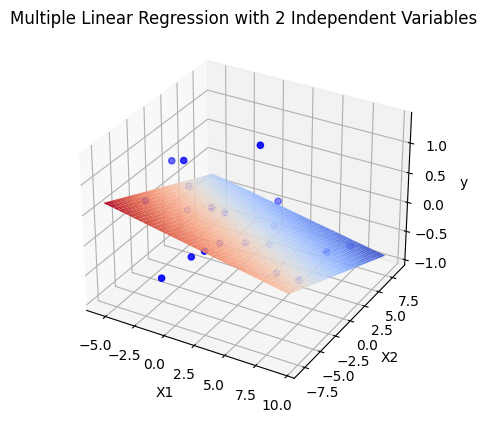

In [ ]:
#@title Regression Plane of Two Independent Variables
#@markdown Being two independent variables, the trend is plotted as a plane

from mpl_toolkits.mplot3d import Axes3D

# Example data
X = np.random.randn(20, 2)*5  # Some independent variables
y = np.random.randn(20,1)   # Dependent variable

# Add a column of ones to matrix X
X = np.c_[np.ones(X.shape[0]), X]

# Calculate the coefficients using the SSR method
beta = multiple_linear_regression(X,y)

# Create a 3D plot of the data and regression surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create a meshgrid of x1 and x2 values
x1_vals = np.arange(np.min(X[:, 1]), np.max(X[:, 1]), 0.1)
x2_vals = np.arange(np.min(X[:, 2]), np.max(X[:, 2]), 0.1)
x1_mesh, x2_mesh = np.meshgrid(x1_vals, x2_vals)

# Calculate predicted y values for each combination of x1 and x2 values
y_pred_mesh = beta[0] + beta[1]*x1_mesh + beta[2]*x2_mesh

# Plot the data points and regression surface
ax.scatter(X[:, 1], X[:, 2], y, c='b', marker='o')
ax.plot_surface(x1_mesh, x2_mesh, y_pred_mesh, cmap='coolwarm')

# Set the axis labels and title
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
ax.set_title('Multiple Linear Regression with 2 Independent Variables')

# Show the plot
plt.show()

### Using Scikit-Learn Library

Coefficients: [3.04159293 4.02085497 5.03293482]
Intercept: 1.5999721230278041


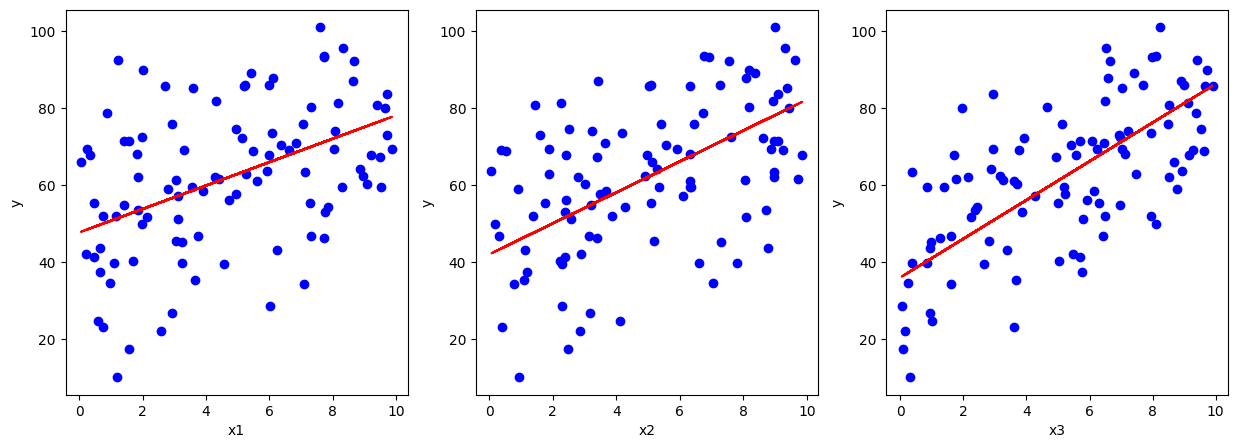

In [ ]:
#@title Independent plots of each independent variable
# Import libraries
from sklearn.linear_model import LinearRegression

# Generate random data
np.random.seed(42) # For reproducibility
n = 100 # Number of observations
x1 = np.random.uniform(0, 10, n) # First independent variable
x2 = np.random.uniform(0, 10, n) # Second independent variable
x3 = np.random.uniform(0, 10, n) # Third independent variable
error = np.random.normal(0, 1, n) # Random error term
y = 2 + 3 * x1 + 4 * x2 + 5 * x3 + error # Dependent variable

# Create and fit the model
model = LinearRegression()
model.fit(np.column_stack((x1, x2, x3)), y)

# Print the coefficients and the intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Plot the independent relationship between Xi and Y
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
ax1.scatter(x1, y, c="blue", marker="o")
ax1.plot(x1, model.intercept_ + model.coef_[0] * x1 + model.coef_[1] * x2.mean() + model.coef_[2] * x3.mean(), color="red")
ax1.set_xlabel("x1")
ax1.set_ylabel("y")
ax2.scatter(x2, y, c="blue", marker="o")
ax2.plot(x2, model.intercept_ + model.coef_[0] * x1.mean() + model.coef_[1] * x2 + model.coef_[2] * x3.mean(), color="red")
ax2.set_xlabel("x2")
ax2.set_ylabel("y")
ax3.scatter(x3, y, c="blue", marker="o")
ax3.plot(x3, model.intercept_ + model.coef_[0] * x1.mean() + model.coef_[1] * x2.mean() + model.coef_[2] * x3, color="red")
ax3.set_xlabel("x3")
ax3.set_ylabel("y")
plt.show()

Coefficients: [3.04159293 4.02085497 5.03293482]
Intercept: 1.5999721230278041


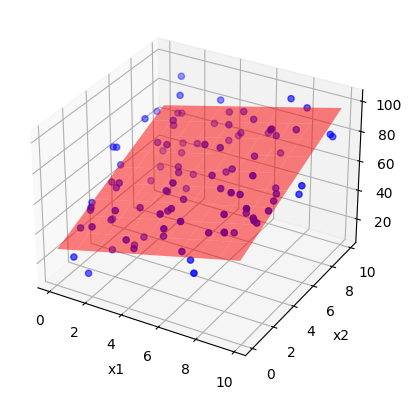

In [ ]:
#@title 3D plot of two independent variables
# Generate random data
np.random.seed(42) # For reproducibility
n = 100 # Number of observations
x1 = np.random.uniform(0, 10, n) # First independent variable
x2 = np.random.uniform(0, 10, n) # Second independent variable
x3 = np.random.uniform(0, 10, n) # Third independent variable
error = np.random.normal(0, 1, n) # Random error term
y = 2 + 3 * x1 + 4 * x2 + 5 * x3 + error # Dependent variable

# Create and fit the model
model = LinearRegression()
model.fit(np.column_stack((x1, x2, x3)), y)

# Print the coefficients and the intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Plot the data and the trend line
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x1, x2, y, c="blue", marker="o")
x1_min, x1_max = x1.min(), x1.max()
x2_min, x2_max = x2.min(), x2.max()
x1_grid, x2_grid = np.meshgrid(np.linspace(x1_min, x1_max, 10), np.linspace(x2_min, x2_max, 10))
y_grid = model.intercept_ + model.coef_[0] * x1_grid + model.coef_[1] * x2_grid + model.coef_[2] * x3.mean()
ax.plot_surface(x1_grid, x2_grid, y_grid, color="red", alpha=0.5)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")
plt.show()

Intercept:  -0.21513736260385485
Coefficients:  [-0.06314661  0.51190476  0.18452381]


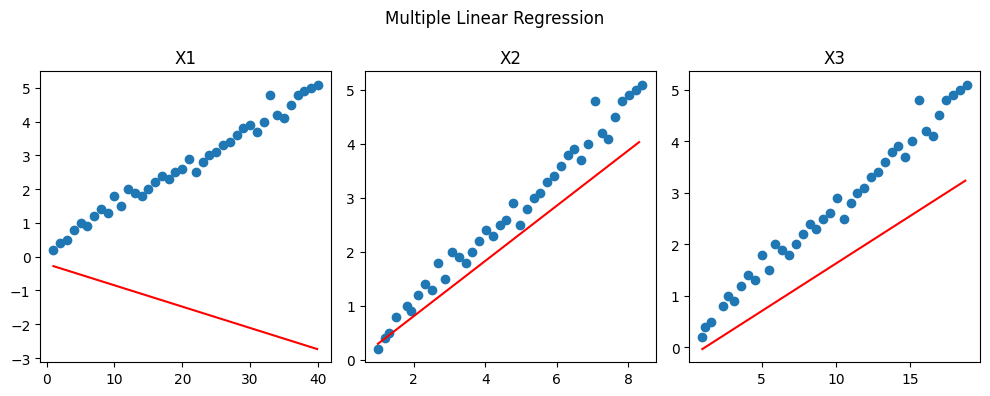

In [ ]:
#@title Retrieving Data from a CSV File
# Import libraries
import pandas as pd

#Data input
file_name = 'data_mlr.csv' #@param {type:"string"}
separator = ';' #@param [";", ","]

# Load data
data = pd.read_csv(file_name, sep = separator)

# Get the number of x columns
num_x_columns = data.shape[1] - 1

# Select first N columns
X = data.iloc[:, :num_x_columns]

y = data["y"] # Dependent variable

# Add a column of ones to matrix X
X = np.c_[np.ones(X.shape[0]), X]

beta = multiple_linear_regression(X,y)

# Print the coefficients
print('Intercept: ', beta[0])
print('Coefficients: ', beta[1:])

#Get the number o columns of the X matrix
columns = np.shape(X)[1]

# Create subplots for each independent variable
fig, axs = plt.subplots(1, columns-1, figsize=(10, 4))

# Plot the regression line for each independent variable
for i in range(1, columns):
    x_vals = np.arange(np.min(X[:, i]), np.max(X[:, i]), 0.1)
    y_vals = beta[0] + beta[i] * x_vals
    axs[i-1].scatter(X[:, i], y)
    axs[i-1].plot(x_vals, y_vals, '-r', label='Regression line')
    axs[i-1].set_title('X' + str(i))

# Set the title and axis labels
fig.suptitle('Multiple Linear Regression')
fig.tight_layout()
plt.show()

Intercept:  -0.21513736260385485
Coefficients:  [-0.06314661  0.51190476  0.18452381]


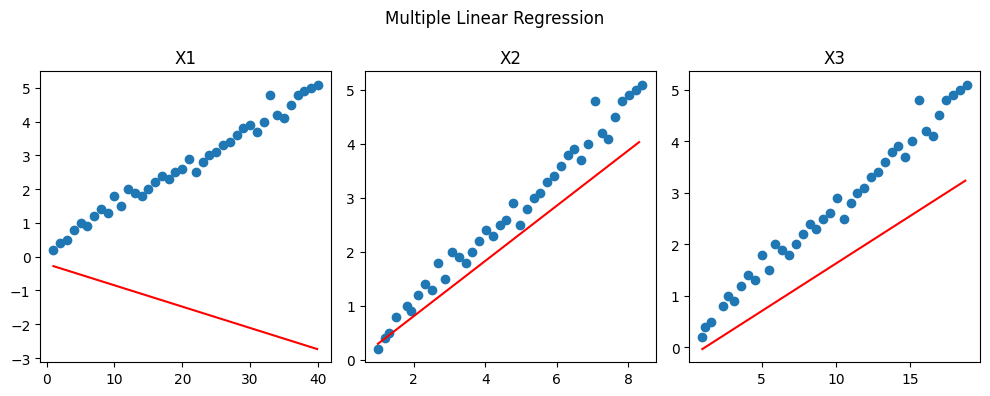

In [ ]:
#@title Retrieving Data from a SQL Database
#@markdown Before executing the cell make sure you upload the file and put its name in the box
import pandas as pd
import sqlite3

#Data input
file_name = 'MyDataBase.db' #@param {type:"string"}
table_name = 'data_mlr' #@param {type:"string"}


# Connect to SQLite database file
conn = sqlite3.connect(file_name)

# Query database and load data into pandas dataframe
df = pd.read_sql_query(f"SELECT * FROM {table_name}", conn)
conn.close()

# Get the number of x columns
num_x_columns = df.shape[1] - 1

# Select first N columns
X = df.iloc[:, :num_x_columns]

y = data["y"] # Dependent variable

# Add a column of ones to matrix X
X = np.c_[np.ones(X.shape[0]), X]

beta = multiple_linear_regression(X,y)

# Print the coefficients
print('Intercept: ', beta[0])
print('Coefficients: ', beta[1:])

#Get the number o columns of the X matrix
columns = np.shape(X)[1]

# Create subplots for each independent variable
fig, axs = plt.subplots(1, columns-1, figsize=(10, 4))

# Plot the regression line for each independent variable
for i in range(1, columns):
    x_vals = np.arange(np.min(X[:, i]), np.max(X[:, i]), 0.1)
    y_vals = beta[0] + beta[i] * x_vals
    axs[i-1].scatter(X[:, i], y)
    axs[i-1].plot(x_vals, y_vals, '-r', label='Regression line')
    axs[i-1].set_title('X' + str(i))

# Set the title and axis labels
fig.suptitle('Multiple Linear Regression')
fig.tight_layout()
plt.show()